In [62]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [63]:
x,y= make_classification(n_samples=100 , n_features=2 , n_informative=1 , n_redundant=0 , n_classes=2 , n_clusters_per_class=1 , random_state=22 , hypercube=False , class_sep=10)

In [64]:
y

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

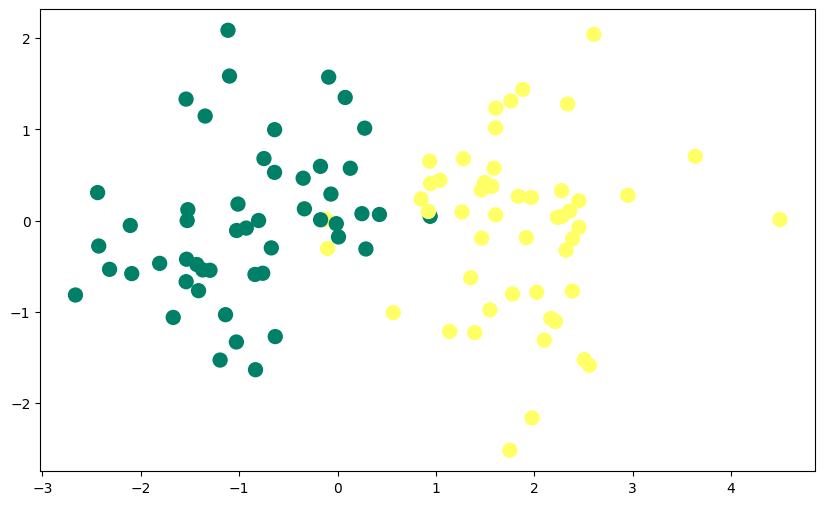

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] , x[:,1], c=y , cmap='summer' , s=100)

labels (y) from make_classification() are 0 and 1, but the perceptron update rule requires -1 and +1.

So when y = 0, the condition becomes:

z * 0 < 0 → 0 < 0 → FALSE

Meaning the perceptron NEVER updates weights for class 0.
That’s why the plot line comes out weird or inconsistent.

In [66]:
def perceptron(x, y):
    w1 = w2 = b = 1.0
    lr = 0.1
    y_mod = np.where(y == 0, -1, 1)

    for epoch in range(1000):
        for i in range(x.shape[0]):
            z = w1*x[i][0] + w2*x[i][1] + b

            if y_mod[i] * z < 0:
                w1 += lr * y_mod[i] * x[i][0]
                w2 += lr * y_mod[i] * x[i][1]
                b  += lr * y_mod[i]

    return w1, w2, b

In [67]:
w1,w2,b= perceptron(x,y)

In [68]:
w1 , w2 ,b

(np.float64(0.32690919522108164),
 np.float64(-0.09644408844497504),
 np.float64(-0.19999999999999993))

In [69]:
m= -(w1/w2)
c= -(b/w2)

print(m,c)

3.3896239830976844 -2.073740373564808


(-3.0, 2.0)

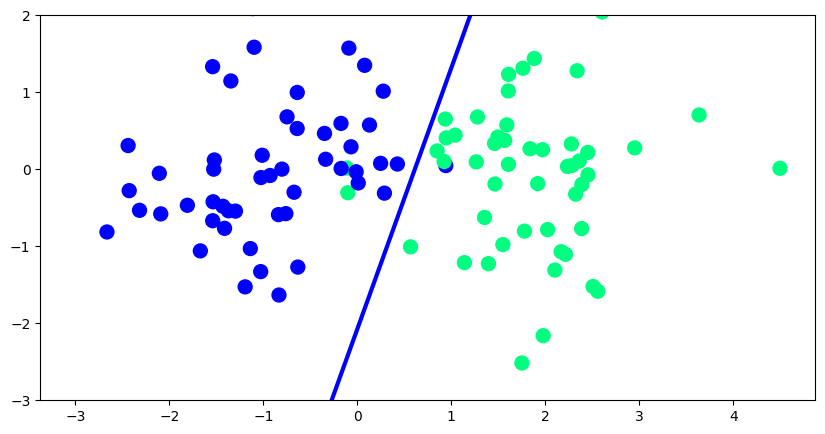

In [70]:
x_input= np.linspace(-3,3,100)
y_input= m*x_input +c

plt.figure(figsize=(10,5))
plt.plot(x_input, y_input , color='blue' , linewidth=3)
plt.scatter(x[:,0], x[:,1], c=y , cmap='winter' , s=100)
plt.ylim(-3,2)